<a href="https://colab.research.google.com/github/adildafedar/Artificial-Intelligence/blob/main/Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ASSIGNMENT 4

Consider any suitable set of image dataset with enough size of sample space to evaluate the effect of noise models. Implement noise models like Gaussian, Salt & Pepper, and Impulse and generate their histograms.

In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob

In [33]:
image_paths = sorted(glob.glob("OIP*.jpeg"))
images = [(path, cv2.imread(path, cv2.IMREAD_GRAYSCALE)) for path in image_paths if cv2.imread(path, cv2.IMREAD_GRAYSCALE) is not None]

In [34]:
def add_gaussian_noise(image, mean=0, var=0.01):
    image = image / 255.0
    noise = np.random.normal(mean, var**0.5, image.shape)
    noisy = np.clip(image + noise, 0, 1)
    return (noisy * 255).astype(np.uint8)

def add_salt_pepper_noise(image, amount=0.02):
    noisy = image.copy()
    num_salt = int(np.ceil(amount * image.size * 0.5))
    num_pepper = int(np.ceil(amount * image.size * 0.5))
    coords_y = np.random.randint(0, image.shape[0], num_salt)
    coords_x = np.random.randint(0, image.shape[1], num_salt)
    noisy[coords_y, coords_x] = 255
    coords_y = np.random.randint(0, image.shape[0], num_pepper)
    coords_x = np.random.randint(0, image.shape[1], num_pepper)
    noisy[coords_y, coords_x] = 0
    return noisy

def add_impulse_noise(image, amount=0.02):
    noisy = image.copy()
    num_pixels = int(amount * image.size)
    coords_y = np.random.randint(0, image.shape[0], num_pixels)
    coords_x = np.random.randint(0, image.shape[1], num_pixels)
    noisy[coords_y, coords_x] = np.random.randint(0, 256, num_pixels)
    return noisy

In [35]:
def plot_histogram(image, title):
    plt.hist(image.ravel(), bins=256, color='gray')
    plt.title(title)
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.grid(False)

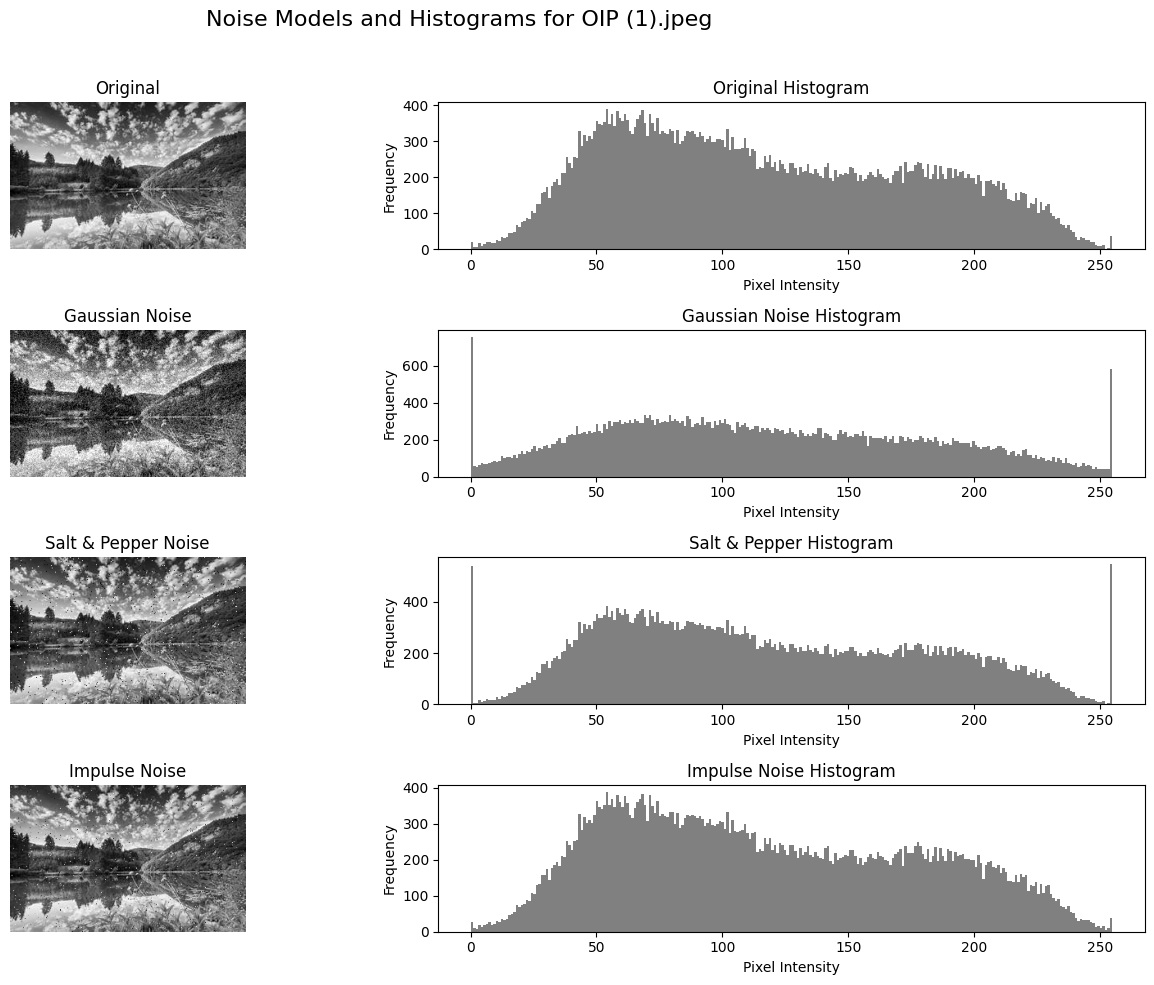

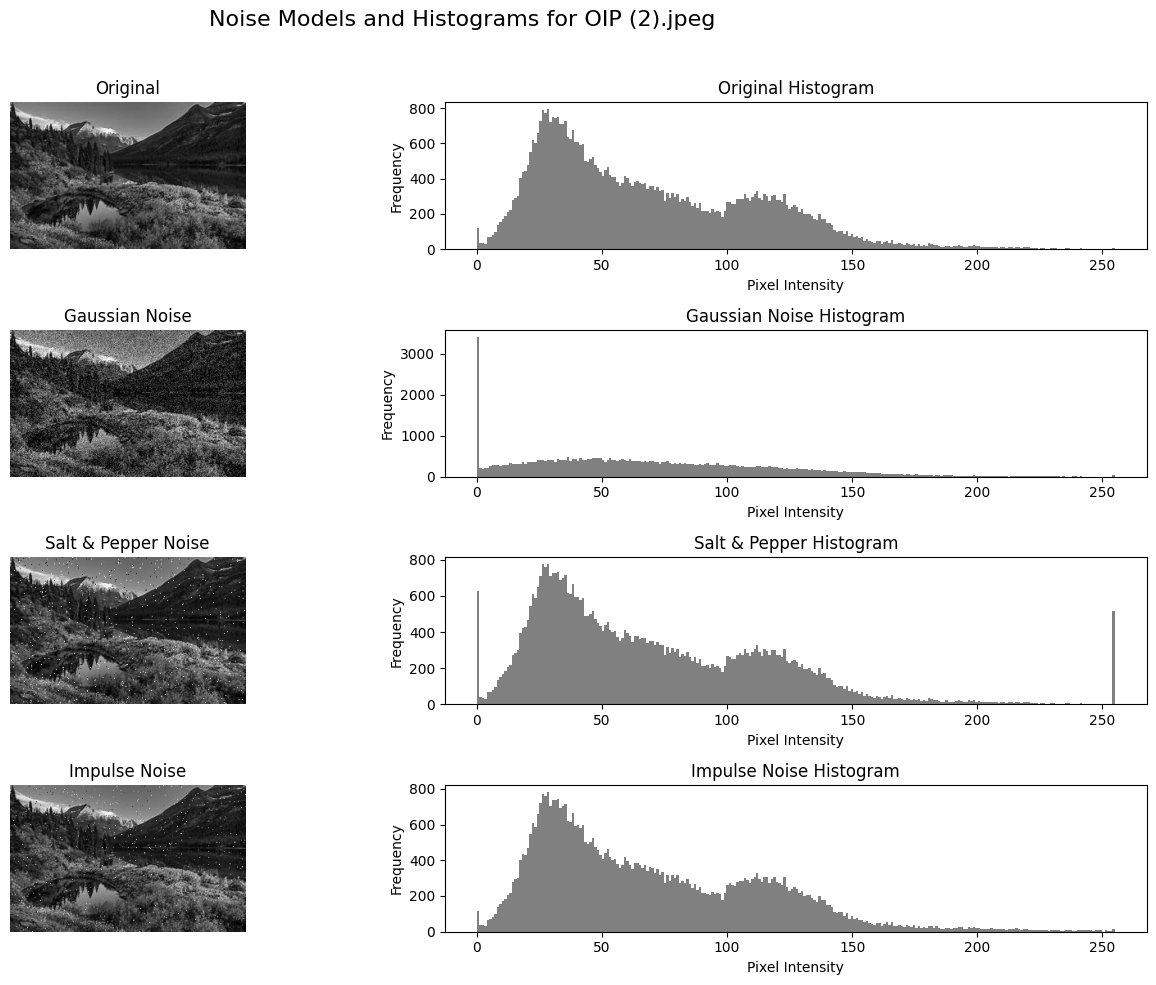

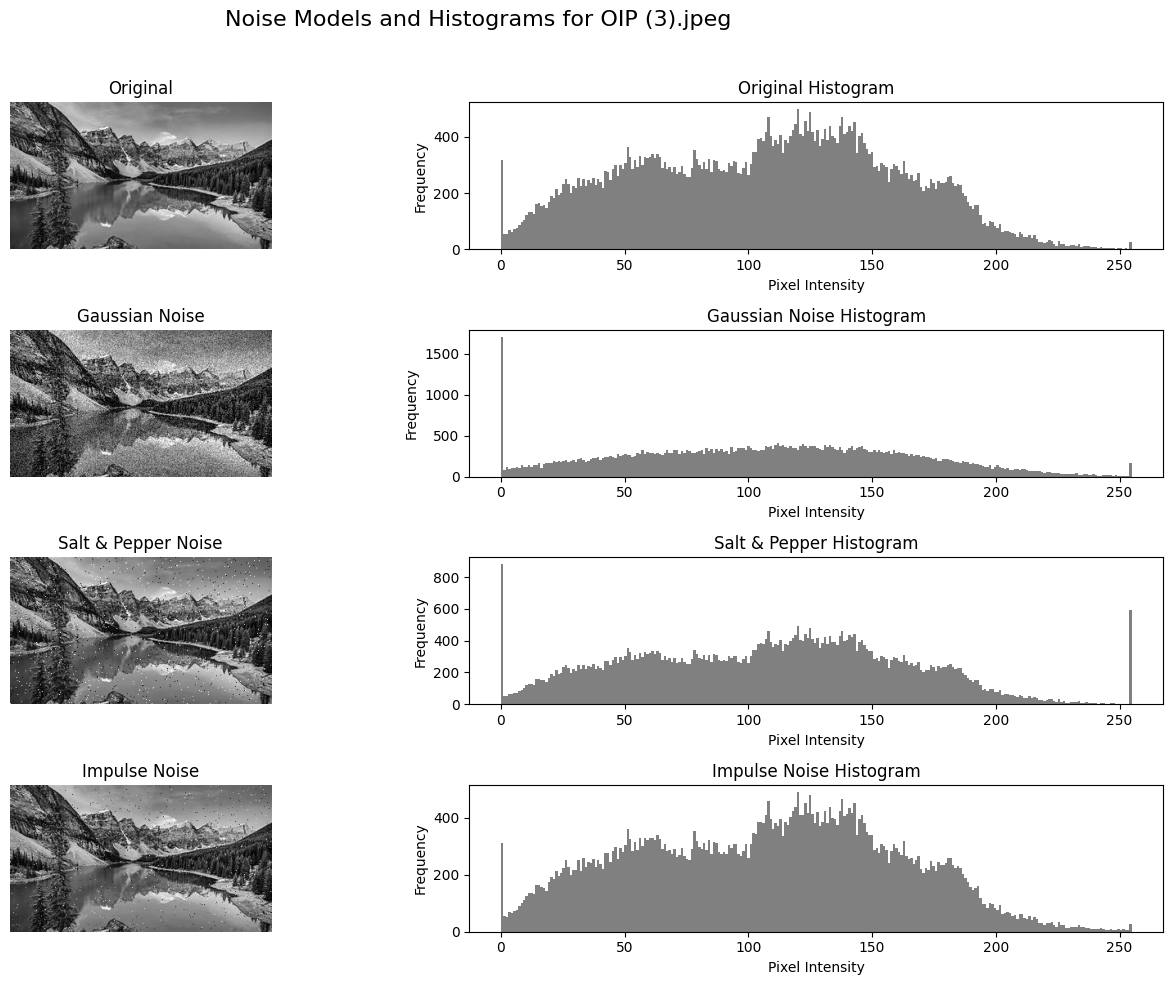

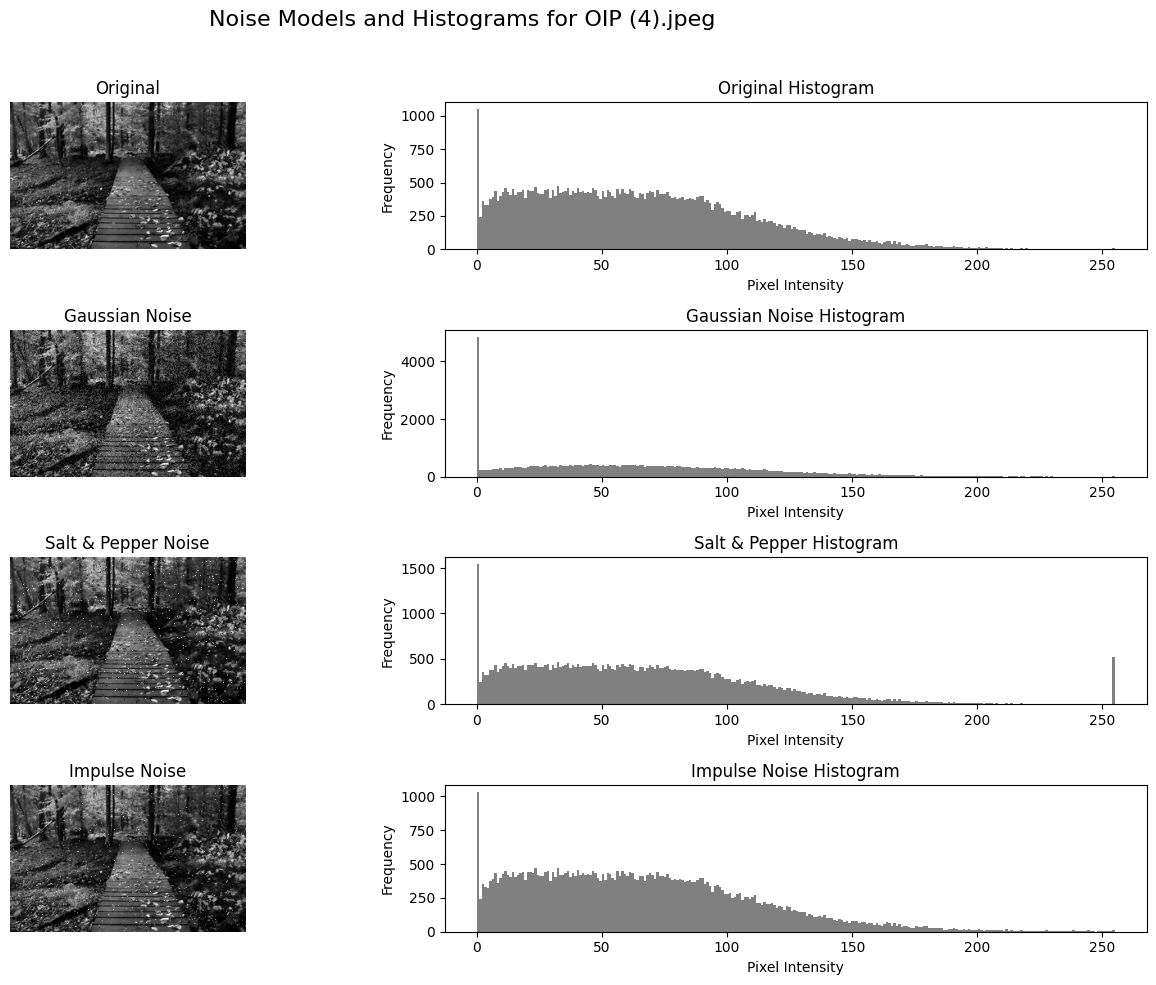

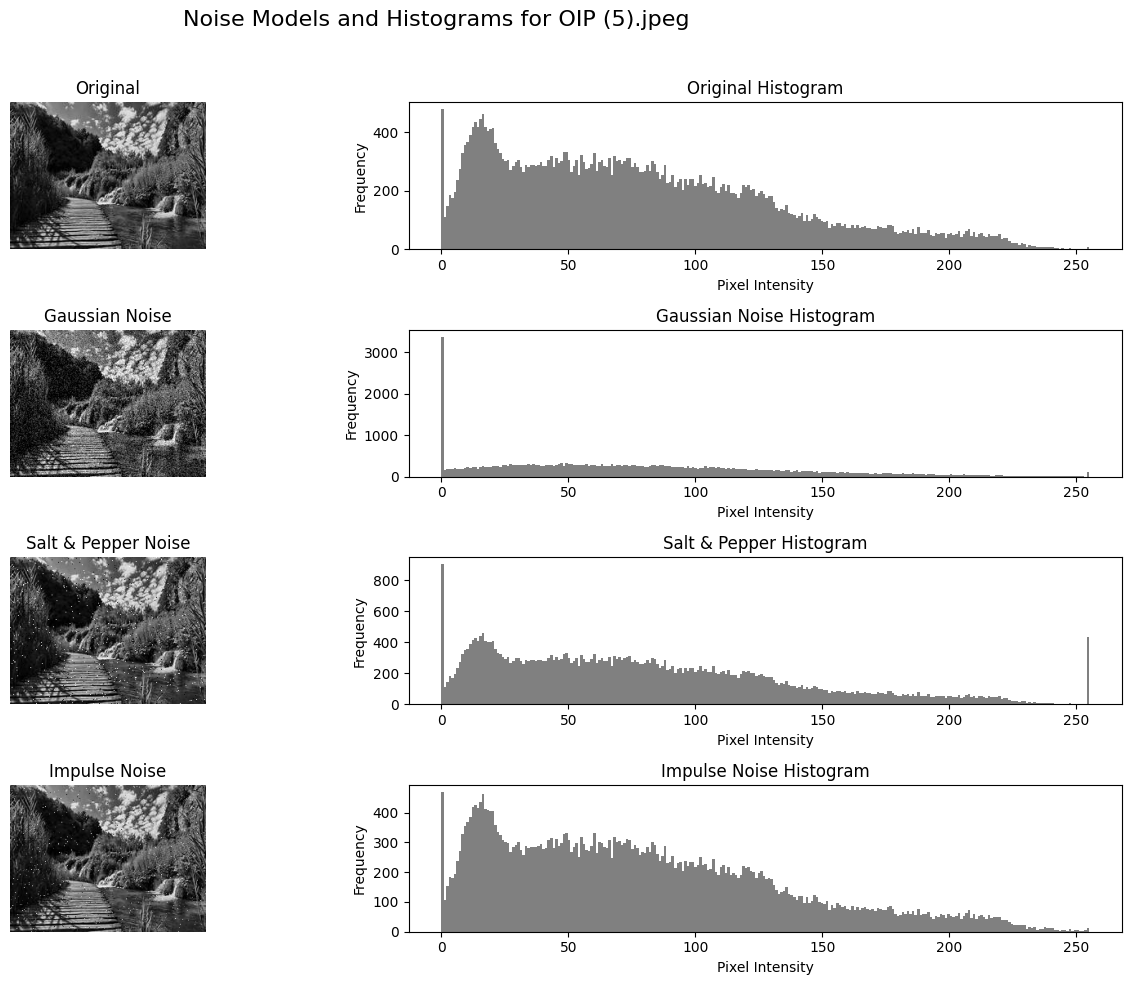

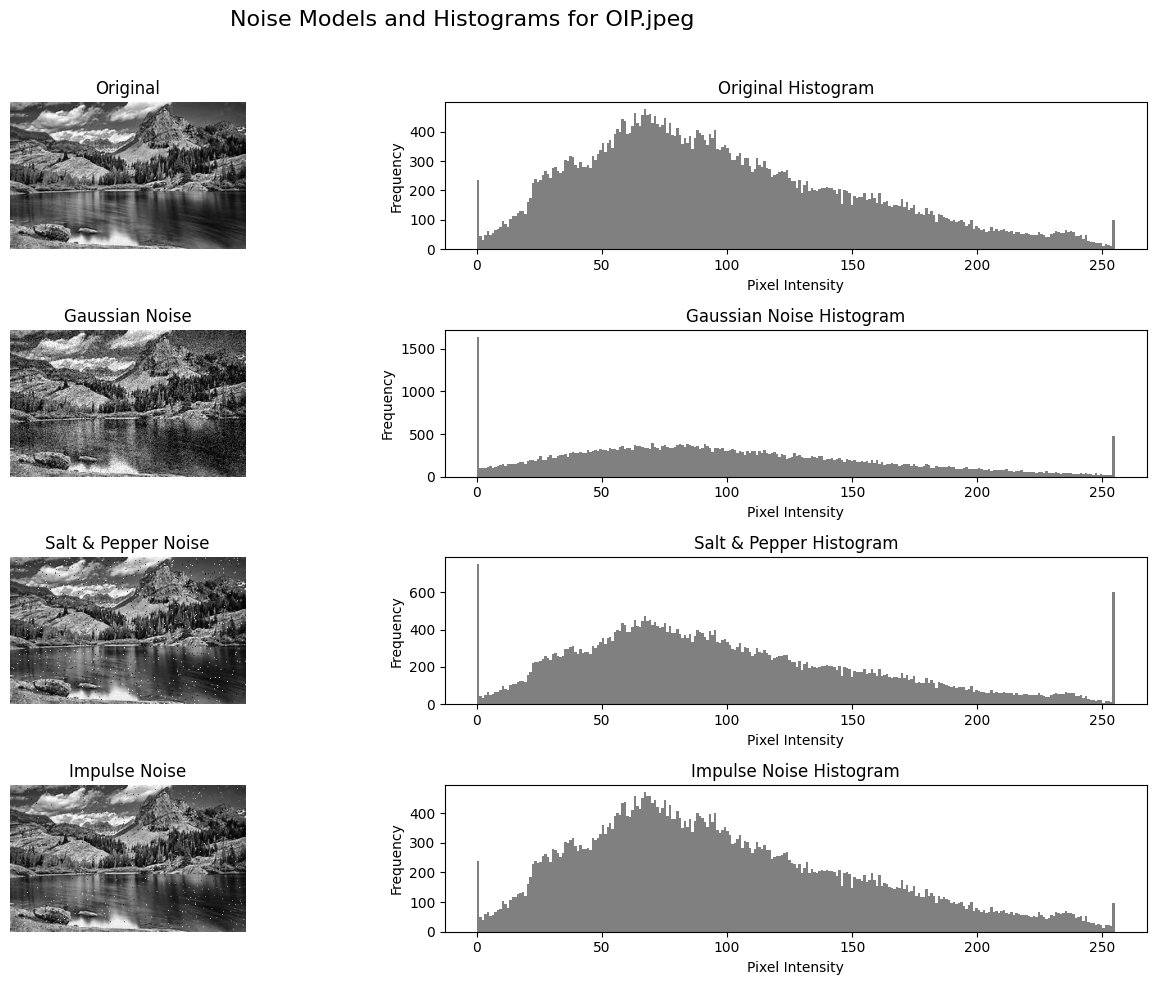

In [36]:
# Loop through all images and apply noise
for name, gray in images:
    # Apply each noise model
    gauss_img = add_gaussian_noise(gray)
    sp_img = add_salt_pepper_noise(gray)
    impulse_img = add_impulse_noise(gray)

    # --- Visualization ---
    plt.figure(figsize=(14,10))
    plt.suptitle(f"Noise Models and Histograms for {name}", fontsize=16)

    # Original
    plt.subplot(4,2,1)
    plt.imshow(gray, cmap='gray')
    plt.title("Original")
    plt.axis('off')

    plt.subplot(4,2,2)
    plot_histogram(gray, "Original Histogram")

    # Gaussian Noise
    plt.subplot(4,2,3)
    plt.imshow(gauss_img, cmap='gray')
    plt.title("Gaussian Noise")
    plt.axis('off')

    plt.subplot(4,2,4)
    plot_histogram(gauss_img, "Gaussian Noise Histogram")

    # Salt & Pepper Noise
    plt.subplot(4,2,5)
    plt.imshow(sp_img, cmap='gray')
    plt.title("Salt & Pepper Noise")
    plt.axis('off')

    plt.subplot(4,2,6)
    plot_histogram(sp_img, "Salt & Pepper Histogram")

    # Impulse Noise
    plt.subplot(4,2,7)
    plt.imshow(impulse_img, cmap='gray')
    plt.title("Impulse Noise")
    plt.axis('off')

    plt.subplot(4,2,8)
    plot_histogram(impulse_img, "Impulse Noise Histogram")

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Conclusion

The notebook applies different noise models on grayscale images and displays their impact through images and histograms stacked vertically for clarity.
